In [1]:
from sklearn.datasets import load_iris
import pandas as pd
#Loading the dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

In [2]:
#Dimensions of the dataset
print(f'Dataset Dimensions: {df.shape}')

Dataset Dimensions: (150, 5)


In [3]:
#Peek at the data
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [4]:
#Statistical summary of all attributes.
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [5]:
#Breakdown of the data by the class variable.
print(df['species'].value_counts())

species
0    50
1    50
2    50
Name: count, dtype: int64


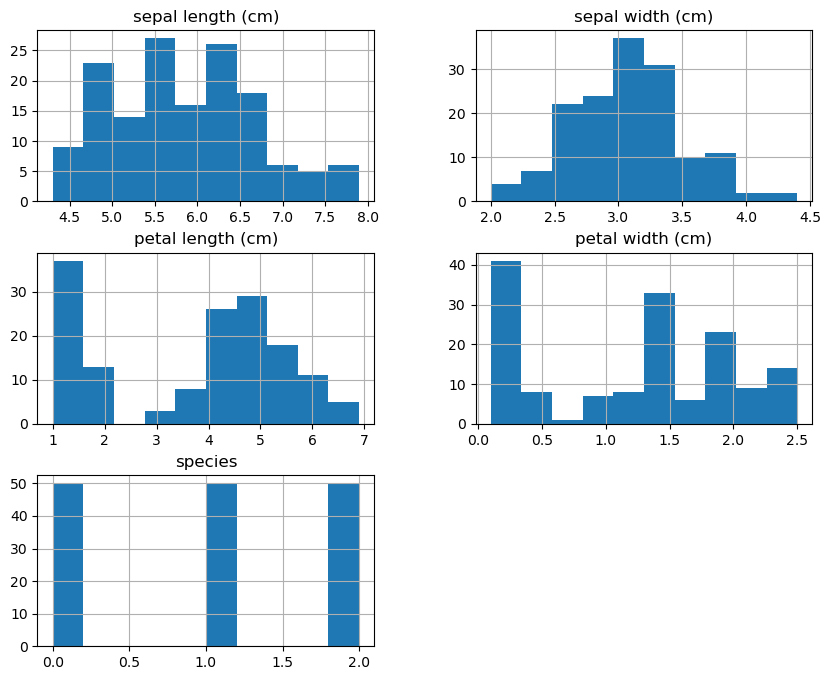

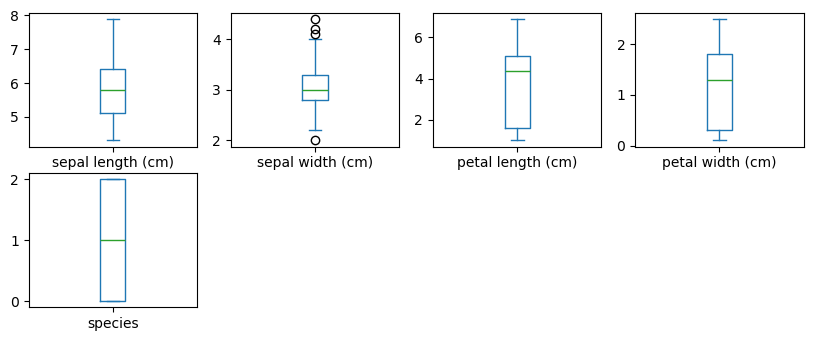

In [6]:
#Univariate plots to better understand each attribute.
import matplotlib.pyplot as plt
import seaborn as sns
df.hist(figsize=(10, 8))
plt.show()
df.plot(kind='box', subplots=True, layout=(4,4), figsize=(10, 8))
plt.show()

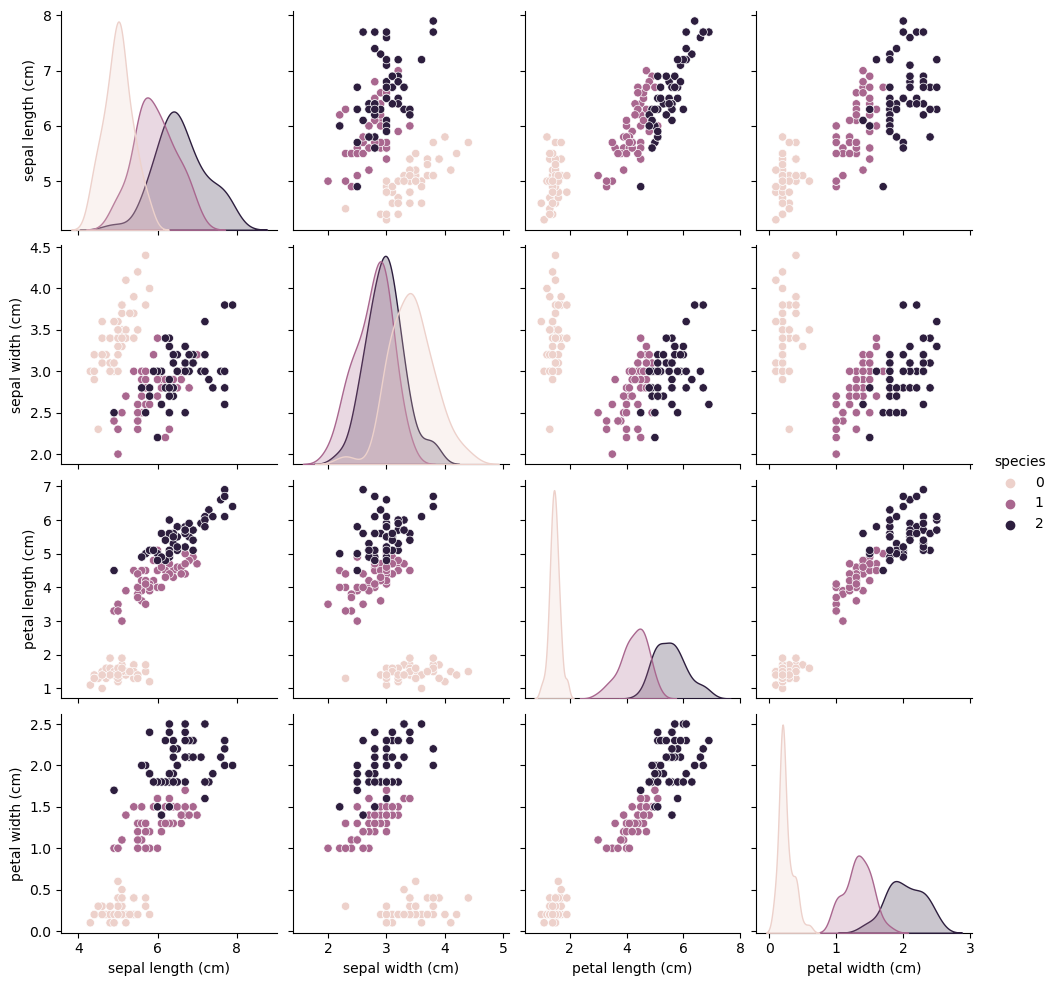

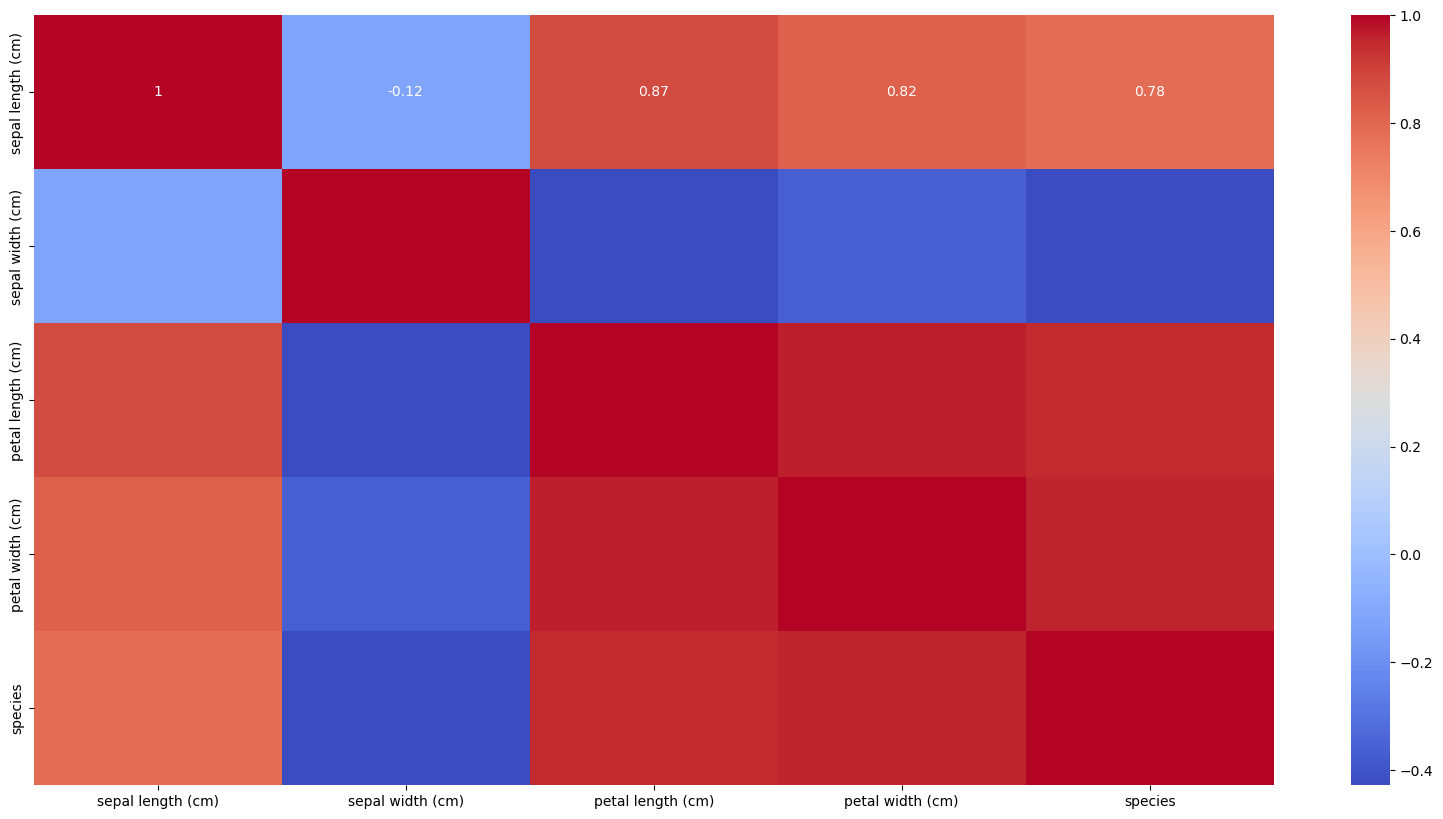

In [7]:
#Multivariate plots to better understand the relationships between attributes.
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df, hue='species')
plt.show()
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [8]:
#Separate out a validation dataset.
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1]
y = df['species']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

In [9]:
#Set-up the test harness to use 10-fold cross validation.
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#Build multiple different models to predict species from flower measurements
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean():.3f} ({cv_results.std():.3f})")

LR: 0.967 (0.041)
LDA: 0.975 (0.038)
KNN: 0.958 (0.042)
CART: 0.958 (0.042)
NB: 0.950 (0.055)
SVM: 0.967 (0.041)


In [10]:
#Select the best model.
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
#Make some predictions
predictions = model.predict(X_val)
from sklearn.metrics import accuracy_score, classification_report
print(f'Accuracy: {accuracy_score(y_val, predictions)}')
print(classification_report(y_val, predictions))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

